# Graficar Fractales Complejos



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")

### Mandelbrot

In [2]:
def mandelbrot(x, y, threshold):
    
    # Condiciones iniciales
    c = complex(x, y)
    z = complex(0, 0)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # diverge
            return i
        
    return threshold - 1  # no diverge

In [3]:
x_start, y_start = -2, -1.5  # inicio
width, height = 3, 3
density_per_unit = 250  # pixeles por unidad

# eje real e imaginario
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)

def animate(i):
    ax.clear()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    
    X = np.empty((len(re), len(im)))
    threshold = round(1.15**(i + 1))
    
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = mandelbrot(re[i], im[j], threshold)
    
    img = ax.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]

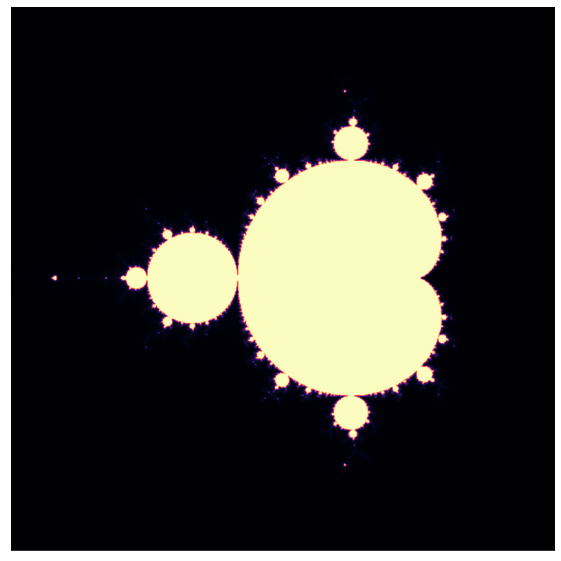

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

anim_mandelbrot = animation.FuncAnimation(fig, animate, frames=45, interval=120, blit=True)
HTML(anim_mandelbrot.to_html5_video())

### Julia

In [5]:
def julia_quadratic(zx, zy, cx, cy, threshold):
    # condiciones iniciales
    z = complex(zx, zy)
    c = complex(cx, cy)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # diverge
            return i
        
    return threshold - 1  # no diverge

In [6]:
x_start, y_start = -2, -2
width, height = 4, 4
density_per_unit = 200

# eje real e imaginario
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)


threshold = 20  # iteraciones máximas
frames = 100  # frames por animación

# c = r*cos(a) + i*r*sin(a) = r*e^{i*a}
r = 0.7885
a = np.linspace(0, 2*np.pi, frames)


def animate(i):
    ax.clear()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    
    X = np.empty((len(re), len(im)))
    cx, cy = r * np.cos(a[i]), r * np.sin(a[i])
    
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = julia_quadratic(re[i], im[j], cx, cy, threshold)
    
    img = ax.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]

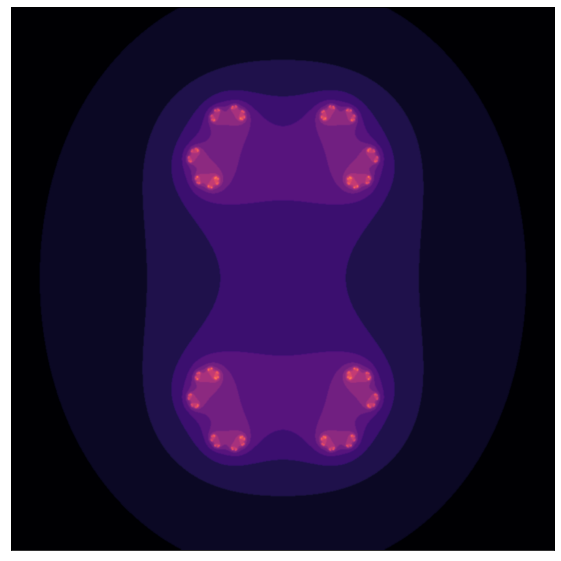

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

anim_julia = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
HTML(anim_julia.to_html5_video())

## Guardar en formato .gif

In [9]:
anim_julia.save('julia.gif', writer='imagemagick')

In [10]:
anim_mandelbrot.save('mandelbrot.gif', writer='imagemagick')